In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch,VerticalPitch
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup
import json
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
url=input("enter the url:" " ")

enter the url: https://1xbet.whoscored.com/Matches/1729478/Live/England-Premier-League-2023-2024-Tottenham-Brighton


In [3]:
response = requests.get(
    url,
    headers={'User-Agent':"Mozilla/5.0"} # you'll be blocked if you don't use some type of user agent
)

In [4]:
response.status_code


200

In [5]:
soup=BeautifulSoup(response.content,"lxml")

In [6]:
scripts=soup.find_all("script")

In [7]:
strings=scripts[20].string

In [8]:
strings

'\r\n        require.config.params["args"] = {\r\n            matchId:1729478,\r\n            matchCentreData: {"playerIdNameDictionary":{"323663":"Cristian Romero","317804":"Richarlison","328512":"Emerson Royal","101859":"Pierre-Emile Højbjerg","130903":"Timo Werner","147863":"Guglielmo Vicario","401044":"Destiny Udogie","303096":"Yves Bissouma","425229":"Micky van de Ven","400097":"Radu Dragusin","403859":"Pape Sarr","362352":"Pedro Porro","355855":"Dejan Kulusevski","303657":"Rodrigo Bentancur","29796":"Fraser Forster","137015":"James Maddison","364215":"Oliver Skipp","103837":"Ben Davies","379688":"Brennan Johnson","91909":"Son Heung-Min","432384":"Facundo Buonanotte","436048":"Carlos Baleba","298694":"Pervis Estupiñán","71824":"Pascal Groß","386979":"Tariq Lamptey","423720":"Evan Ferguson","425142":"Kaoru Mitoma","400138":"Bart Verbruggen","110290":"Joël Veltman","365402":"Jan Paul van Hecke","399378":"Jakub Moder","382234":"Ansu Fati","21683":"Adam Lallana","39308":"Danny Welbeck

In [9]:
ind_start=strings.index("matchCentreData:")+17
ind_end=strings.index(",\r\n            matchCentreEventTypeJson")

In [10]:
jason_data=strings[ind_start:ind_end]

In [11]:
jason_data

'{"playerIdNameDictionary":{"323663":"Cristian Romero","317804":"Richarlison","328512":"Emerson Royal","101859":"Pierre-Emile Højbjerg","130903":"Timo Werner","147863":"Guglielmo Vicario","401044":"Destiny Udogie","303096":"Yves Bissouma","425229":"Micky van de Ven","400097":"Radu Dragusin","403859":"Pape Sarr","362352":"Pedro Porro","355855":"Dejan Kulusevski","303657":"Rodrigo Bentancur","29796":"Fraser Forster","137015":"James Maddison","364215":"Oliver Skipp","103837":"Ben Davies","379688":"Brennan Johnson","91909":"Son Heung-Min","432384":"Facundo Buonanotte","436048":"Carlos Baleba","298694":"Pervis Estupiñán","71824":"Pascal Groß","386979":"Tariq Lamptey","423720":"Evan Ferguson","425142":"Kaoru Mitoma","400138":"Bart Verbruggen","110290":"Joël Veltman","365402":"Jan Paul van Hecke","399378":"Jakub Moder","382234":"Ansu Fati","21683":"Adam Lallana","39308":"Danny Welbeck","86441":"Lewis Dunk","33532":"Jason Steele","109922":"Adam Webster","381255":"Billy Gilmour","492543":"Benic

In [12]:
data=json.loads(jason_data)

In [13]:
events=data["events"]

In [14]:
df=pd.DataFrame(events)

In [15]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endY,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,relatedEventId,relatedPlayerId,cardType
0,2.644473e+09,2,0,0.0,30,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.644473e+09,3,0,0.0,211,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.644473e+09,3,0,0.0,30,50.1,49.8,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,53.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.644473e+09,4,0,2.0,30,40.7,56.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,62.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.644473e+09,5,0,5.0,30,30.1,66.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,31.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,2.644718e+09,922,98,11.0,30,0.0,0.0,105,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687,2.644719e+09,923,0,0.0,30,0.0,0.0,15,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1688,2.644719e+09,921,0,0.0,211,0.0,0.0,15,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1689,2.644408e+09,1,0,0.0,30,0.0,0.0,0,"{'value': 16, 'displayName': 'PreMatch'}","{'value': 34, 'displayName': 'FormationSet'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# clean type data
#df["period"]=df["period"].apply(lambda x:str(x))
#df["period"]=df["period"].str.split(":",n=3,expand=True)[2]
#df["period"]=df["period"].str.replace("[^a-zA-Z0-9]",'',regex=True)

In [17]:
# creat function for cleaning
def clean_data(x):
    x1=x.apply(lambda x:str(x))
    x2=x1.str.split(":",n=3,expand=True)[2]
    x3=x2.str.replace("[^a-zA-Z0-9]",'',regex=True)
    return x3



In [18]:
# for period ,type
df["period"]=clean_data(df["period"])
df["type"]=clean_data(df["type"])
df["outcomeType"]=clean_data(df["outcomeType"])

In [19]:
df1=df[["id","eventId","minute","second","teamId","x","y","endX","endY","period","type","outcomeType","playerId"]]

In [20]:
df1

,id,eventId,minute,second,teamId,x,y,endX,endY,period,type,outcomeType,playerId
0,2.644473e+09,2,0,0.0,30,0.0,0.0,NaN,NaN,FirstHalf,Start,Successful,NaN
1,2.644473e+09,3,0,0.0,211,0.0,0.0,NaN,NaN,FirstHalf,Start,Successful,NaN
2,2.644473e+09,3,0,0.0,30,50.1,49.8,38.2,53.5,FirstHalf,Pass,Successful,317804.0
3,2.644473e+09,4,0,2.0,30,40.7,56.4,29.2,62.4,FirstHalf,Pass,Successful,303657.0
4,2.644473e+09,5,0,5.0,30,30.1,66.4,28.9,31.5,FirstHalf,Pass,Successful,425229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,2.644718e+09,922,98,11.0,30,0.0,0.0,NaN,NaN,SecondHalf,End,Successful,NaN
1687,2.644719e+09,923,0,0.0,30,0.0,0.0,NaN,NaN,PostGame,End,Successful,NaN
1688,2.644719e+09,921,0,0.0,211,0.0,0.0,NaN,NaN,PostGame,End,Successful,NaN
1689,2.644408e+09,1,0,0.0,30,0.0,0.0,NaN,NaN,PreMatch,FormationSet,Successful,NaN


In [21]:
#PLAYER NAME
player_data=data["playerIdNameDictionary"]

In [22]:
player_data=pd.Series(player_data)

In [23]:
player_data=pd.DataFrame(player_data)

In [24]:
player_data.reset_index(inplace=True)

In [25]:
player_data.columns=["playerId","playername"]

In [26]:
player_data["playerId"]=player_data["playerId"].apply(lambda x:int(x))

In [27]:
#MARGE THE NAME OF THE PLAYER AND EVENT DATA
df2=pd.merge(df1,player_data,on="playerId",how="left")

In [28]:
df2["teamId"].unique()

array([ 30, 211], dtype=int64)

In [29]:
team1=input("enter the team name: ")
team2=input("enter the team name: ")

enter the team name: Tottenham
enter the team name: Brighton


In [30]:
#mapping two teams name
a={df2["teamId"].unique()[0]:team1,df2["teamId"].unique()[1]:team2}

In [31]:
df2["teamId"]=df2["teamId"].map(a)

In [32]:
df2

,id,eventId,minute,second,teamId,x,y,endX,endY,period,type,outcomeType,playerId,playername
0,2.644473e+09,2,0,0.0,Tottenham,0.0,0.0,NaN,NaN,FirstHalf,Start,Successful,NaN,NaN
1,2.644473e+09,3,0,0.0,Brighton,0.0,0.0,NaN,NaN,FirstHalf,Start,Successful,NaN,NaN
2,2.644473e+09,3,0,0.0,Tottenham,50.1,49.8,38.2,53.5,FirstHalf,Pass,Successful,317804.0,Richarlison
3,2.644473e+09,4,0,2.0,Tottenham,40.7,56.4,29.2,62.4,FirstHalf,Pass,Successful,303657.0,Rodrigo Bentancur
4,2.644473e+09,5,0,5.0,Tottenham,30.1,66.4,28.9,31.5,FirstHalf,Pass,Successful,425229.0,Micky van de Ven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,2.644718e+09,922,98,11.0,Tottenham,0.0,0.0,NaN,NaN,SecondHalf,End,Successful,NaN,NaN
1687,2.644719e+09,923,0,0.0,Tottenham,0.0,0.0,NaN,NaN,PostGame,End,Successful,NaN,NaN
1688,2.644719e+09,921,0,0.0,Brighton,0.0,0.0,NaN,NaN,PostGame,End,Successful,NaN,NaN
1689,2.644408e+09,1,0,0.0,Tottenham,0.0,0.0,NaN,NaN,PreMatch,FormationSet,Successful,NaN,NaN


In [33]:
#replace null value with zero
df2[["endX","endY"]]=df2[["endX","endY"]].fillna(0,axis=1)

In [34]:
df2

,id,eventId,minute,second,teamId,x,y,endX,endY,period,type,outcomeType,playerId,playername
0,2.644473e+09,2,0,0.0,Tottenham,0.0,0.0,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN
1,2.644473e+09,3,0,0.0,Brighton,0.0,0.0,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN
2,2.644473e+09,3,0,0.0,Tottenham,50.1,49.8,38.2,53.5,FirstHalf,Pass,Successful,317804.0,Richarlison
3,2.644473e+09,4,0,2.0,Tottenham,40.7,56.4,29.2,62.4,FirstHalf,Pass,Successful,303657.0,Rodrigo Bentancur
4,2.644473e+09,5,0,5.0,Tottenham,30.1,66.4,28.9,31.5,FirstHalf,Pass,Successful,425229.0,Micky van de Ven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,2.644718e+09,922,98,11.0,Tottenham,0.0,0.0,0.0,0.0,SecondHalf,End,Successful,NaN,NaN
1687,2.644719e+09,923,0,0.0,Tottenham,0.0,0.0,0.0,0.0,PostGame,End,Successful,NaN,NaN
1688,2.644719e+09,921,0,0.0,Brighton,0.0,0.0,0.0,0.0,PostGame,End,Successful,NaN,NaN
1689,2.644408e+09,1,0,0.0,Tottenham,0.0,0.0,0.0,0.0,PreMatch,FormationSet,Successful,NaN,NaN


In [35]:
# import xt grid
xt=pd.read_csv("xT_Grid.csv",header=None)
xT_grid=np.array(xt)
xT_grid.shape

(8, 12)

In [36]:
xT_grid.shape


(8, 12)

In [37]:
xt_cols=xT_grid.shape[0]
xt_rows=xT_grid.shape[1]

In [38]:
df2["x1_bin"]=pd.cut(df2["x"],bins=xt_cols,labels=False)
df2["y1_bin"]=pd.cut(df2["y"],bins=xt_rows,labels=False)
df2["x2_bin"]=pd.cut(df2["endX"],bins=xt_cols,labels=False)
df2["y2_bin"]=pd.cut(df2["endY"],bins=xt_rows,labels=False)

In [39]:
# calculate the xT VALUES
df2['start_zone_value'] = df2[['x1_bin', 'y1_bin']].apply(lambda x: xt[x[1]][x[0]], axis=1)
df2['end_zone_value']=df2[["x2_bin","y2_bin"]].apply(lambda x:xt[x[1]][x[0]], axis=1 )
df2["xt"]=df2["end_zone_value"]-df2["start_zone_value"]



C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\3448601869.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df2['start_zone_value'] = df2[['x1_bin', 'y1_bin']].apply(lambda x: xt[x[1]][x[0]], axis=1)
C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\3448601869.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df2['end_zone_value']=df2[["x2_bin","y2_bin"]].apply(lambda x:xt[x[1]][x[0]], axis=1 )


In [40]:
df2

,id,eventId,minute,second,teamId,x,y,endX,endY,period,...,outcomeType,playerId,playername,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,xt
0,2.644473e+09,2,0,0.0,Tottenham,0.0,0.0,0.0,0.0,FirstHalf,...,Successful,NaN,NaN,0,0,0,0,0.006383,0.006383,0.000000
1,2.644473e+09,3,0,0.0,Brighton,0.0,0.0,0.0,0.0,FirstHalf,...,Successful,NaN,NaN,0,0,0,0,0.006383,0.006383,0.000000
2,2.644473e+09,3,0,0.0,Tottenham,50.1,49.8,38.2,53.5,FirstHalf,...,Successful,317804.0,Richarlison,4,5,3,6,0.014846,0.016895,0.002049
3,2.644473e+09,4,0,2.0,Tottenham,40.7,56.4,29.2,62.4,FirstHalf,...,Successful,303657.0,Rodrigo Bentancur,3,6,2,7,0.016895,0.019351,0.002456
4,2.644473e+09,5,0,5.0,Tottenham,30.1,66.4,28.9,31.5,FirstHalf,...,Successful,425229.0,Micky van de Ven,2,7,2,3,0.019351,0.011105,-0.008247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,2.644718e+09,922,98,11.0,Tottenham,0.0,0.0,0.0,0.0,SecondHalf,...,Successful,NaN,NaN,0,0,0,0,0.006383,0.006383,0.000000
1687,2.644719e+09,923,0,0.0,Tottenham,0.0,0.0,0.0,0.0,PostGame,...,Successful,NaN,NaN,0,0,0,0,0.006383,0.006383,0.000000
1688,2.644719e+09,921,0,0.0,Brighton,0.0,0.0,0.0,0.0,PostGame,...,Successful,NaN,NaN,0,0,0,0,0.006383,0.006383,0.000000
1689,2.644408e+09,1,0,0.0,Tottenham,0.0,0.0,0.0,0.0,PreMatch,...,Successful,NaN,NaN,0,0,0,0,0.006383,0.006383,0.000000


In [41]:

#calculate sum of all action of xt of two teams
def xt_sum(df):
    df.dropna(subset=["playername"],inplace=True)
    sum_xt=df.groupby(["teamId","playername"])["xt"].sum()
    return sum_xt
        
        

In [42]:
xt_sum(df2)

teamId     playername           
Brighton   Adam Lallana            -0.008099
           Ansu Fati               -0.223417
           Benicio Baker-Boaitey   -0.007314
           Billy Gilmour            0.193724
           Carlos Baleba           -0.005798
           Danny Welbeck           -0.188421
           Evan Ferguson           -0.044023
           Facundo Buonanotte      -0.060609
           Jan Paul van Hecke       0.028503
           Jason Steele             0.667327
           Joël Veltman             0.002332
           Kaoru Mitoma            -1.331628
           Lewis Dunk               0.990176
           Pascal Groß             -0.026855
           Pervis Estupiñán        -2.455195
           Tariq Lamptey           -0.012452
Tottenham  Ben Davies              -0.513790
           Brennan Johnson         -0.038742
           Cristian Romero          0.181952
           Dejan Kulusevski        -0.002529
           Destiny Udogie          -0.579784
           Guglielmo V

# creating passing network

In [64]:
# first sub
def transform1(df,team):
    
    df["passer"]=df["playername"]
    df["recipiant"]=df["playername"].shift(-1)
    #cleaning complete
    sub=df[(df["teamId"]==team)&(df["type"]== 'SubstitutionOff')]["minute"].min()
    
    clean_data=df[(df["teamId"]==team)&(df["minute"]<sub)&(df["type"]=="Pass")&(df["outcomeType"]=="Successful")]
    clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
    clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
    clean_data["endX"]=clean_data["endX"].apply(lambda x: x*1.2)
    clean_data["endY"]=clean_data["endY"].apply(lambda x: x*.8)
    # start transform
    average_loc=clean_data.groupby("passer").agg({"x":["mean"],"y":["mean","count"],"xt":["sum"]})
    average_loc.columns=["x","y","pass_count","xT"]
    #beteen pass 
    between_loc=clean_data.groupby(["passer","recipiant"]).id.count().reset_index()
    between_loc.rename({"id":"pass_count"},axis="columns",inplace=True)
    pass_between=between_loc.merge(average_loc, left_on='passer',right_index=True)
    pass_between = pass_between.merge(average_loc, left_on="recipiant",right_index=True,suffixes=['', '_end'])
    def normalization(x):
        return (x-x.min())/(x.max()-x.min())
    pass_between["normalization_pass"]=normalization(pass_between["pass_count_x"])
  
    return  pass_between
   
           
    
   
  
    


 


In [65]:
def transform2(df,team):
    
    
    #cleaning complete
    sub=df[(df["teamId"]==team)&(df["type"]== 'SubstitutionOff')]["minute"].min()
    
    clean_data=df[(df["teamId"]==team)&(df["minute"]<sub)&(df["type"]=="Pass")&(df["outcomeType"]=="Successful")]
    clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
    clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
    clean_data["endX"]=clean_data["endX"].apply(lambda x: x*1.2)
    clean_data["endY"]=clean_data["endY"].apply(lambda x: x*.8)
    
    clean_data["passer"]=clean_data["playername"]
    clean_data["recipiant"]=clean_data["passer"].shift(-1)
    # start transform
    average_loc=clean_data.groupby("passer").agg({"x":["mean"],"y":["mean","count"],"xt":["sum"]})
    average_loc.columns=["x","y","pass_count","xT"]
    average_loc.reset_index(inplace=True)
   
    average_loc["passer"]=average_loc["passer"].str.split(" ",n=2,expand=True)[0]
        
   
   
   
   
            
    return average_loc

In [66]:
#home data1
homedata1=transform1(df2,team1)

C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1464492864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1464492864.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1464492864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [67]:
#home data2
homedata2=transform2(df2,team1)

C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1548641876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1548641876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1548641876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [68]:
# away data1
away1_data=transform1(df2,team2)

C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1464492864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1464492864.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1464492864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [69]:
#away data2
away2_data=transform2(df2,team2)

C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1548641876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["x"]=clean_data["x"].apply(lambda x: x*1.2)
C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1548641876.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["y"]=clean_data["y"].apply(lambda x: x*.8)
C:\Users\welcome\AppData\Local\Temp\ipykernel_8424\1548641876.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [70]:
away2_data

,passer,x,y,pass_count,xT
0,Adam,54.817500,50.055000,16,0.090611
1,Billy,46.113103,47.964138,29,0.329719
2,Danny,62.072000,29.141333,15,0.037746
3,Facundo,66.411429,20.988571,14,0.009869
4,Jan,36.801290,25.664516,31,0.135838
5,Jason,8.554286,39.592381,21,0.178059
6,Kaoru,50.360000,67.733333,9,-0.086289
7,Lewis,28.402286,54.320000,35,0.696231
8,Pascal,54.401250,25.460000,32,0.121645
9,Pervis,46.487143,69.297143,28,-1.049076


In [61]:
homedata2

,passer,x,y,pass_count,xT
0,Cristian,30.936000,27.397333,15,0.032590
1,Dejan,42.360000,6.986667,3,0.004931
2,Destiny,32.013333,60.915556,9,-0.144875
3,Guglielmo,16.757647,35.755294,17,0.098431
4,James,40.416000,48.136000,10,0.075304
5,Micky,30.278571,52.528571,28,0.453650
6,Pape,36.110000,26.520000,12,-0.002882
7,Pedro,36.146667,32.017778,9,0.042717
8,Rodrigo,38.127273,41.898182,11,0.115084
9,Timo,38.280000,72.080000,1,-0.035560


In [62]:
homedata1


,passer,recipiant,pass_count_x,x,y,pass_count_y,xT,x_end,y_end,pass_count,xT_end,normalization_pass
0,Cristian Romero,Dejan Kulusevski,1,30.936000,27.397333,15,0.032590,42.360000,6.986667,3,0.004931,0.000000
26,James Maddison,Dejan Kulusevski,1,40.416000,48.136000,10,0.075304,42.360000,6.986667,3,0.004931,0.000000
33,Micky van de Ven,Dejan Kulusevski,1,30.278571,52.528571,28,0.453650,42.360000,6.986667,3,0.004931,0.000000
42,Pape Sarr,Dejan Kulusevski,2,36.110000,26.520000,12,-0.002882,42.360000,6.986667,3,0.004931,0.166667
47,Pedro Porro,Dejan Kulusevski,2,36.146667,32.017778,9,0.042717,42.360000,6.986667,3,0.004931,0.166667
1,Cristian Romero,Destiny Udogie,1,30.936000,27.397333,15,0.032590,32.013333,60.915556,9,-0.144875,0.000000
18,Guglielmo Vicario,Destiny Udogie,1,16.757647,35.755294,17,0.098431,32.013333,60.915556,9,-0.144875,0.000000
27,James Maddison,Destiny Udogie,1,40.416000,48.136000,10,0.075304,32.013333,60.915556,9,-0.144875,0.000000
48,Pedro Porro,Destiny Udogie,1,36.146667,32.017778,9,0.042717,32.013333,60.915556,9,-0.144875,0.000000
2,Cristian Romero,Guglielmo Vicario,2,30.936000,27.397333,15,0.032590,16.757647,35.755294,17,0.098431,0.166667


enter club_logo: tottenham.png
enter club_logo: brighton.png


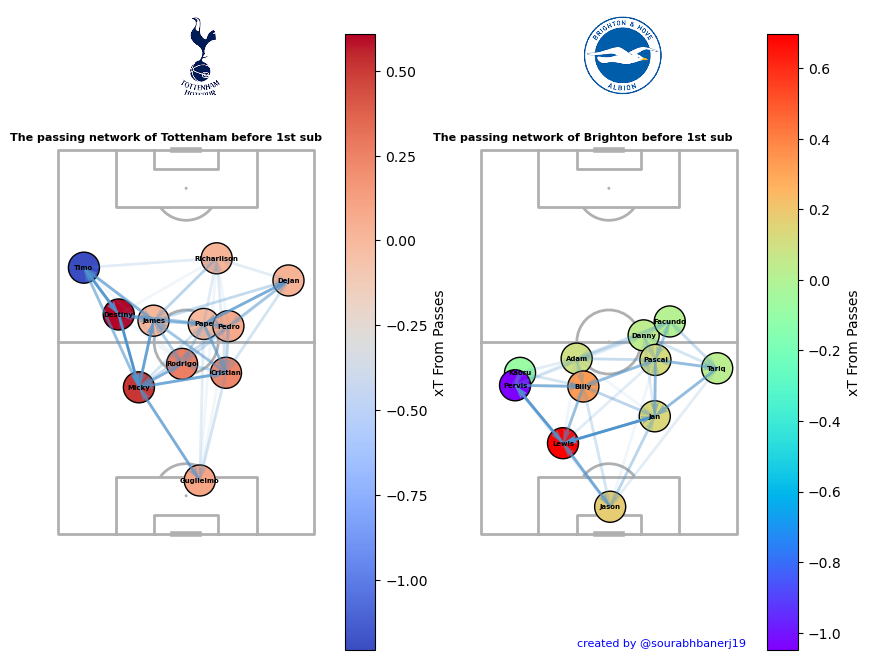

In [72]:
#home team
fig,ax=plt.subplots(1,2,figsize=(10,8))
pitch=VerticalPitch(pitch_type="statsbomb",)
pitch.draw(ax=ax[0])
nodes=pitch.scatter(homedata2["x"],homedata2["y"],ax=ax[0],s=500,cmap='coolwarm',marker="o",edgecolors="k",c=homedata2["xT"],zorder=1)


lines=pitch.arrows(homedata1["x"],homedata1["y"],homedata1["x_end"],homedata1["y_end"],ax=ax[0],lw=3,width=2,zorder=1,color="#4F94CD",alpha=homedata1["normalization_pass"])
ax[0].invert_xaxis()
for index,row in homedata2.iterrows():
    annotation=pitch.annotate(row.passer,xy=(row.x,row.y),c="black",va="center",ha="center",size=5,weight='bold', ax=ax[0])

cbar = plt.colorbar(nodes, label="xT From Passes")
text=ax[0].text(s=f"The passing network of {team1} before 1st sub",x=95,y=123,size=8,weight="bold")
# away team


pitch.draw(ax=ax[1])
nodes=pitch.scatter(away2_data["x"],away2_data["y"],ax=ax[1],s=500,cmap='rainbow',marker="o",edgecolors="k",c=away2_data["xT"],zorder=1)
lines=pitch.arrows(away1_data["x"],away1_data["y"],away1_data["x_end"],away1_data["y_end"],ax=ax[1],lw=3,width=2,zorder=1,color="#4F94CD",alpha=away1_data["normalization_pass"])

for index,row in away2_data.iterrows():
    annotation=pitch.annotate(row.passer,xy=(row.x,row.y),c="black",va="center",ha="center",size=5,weight='bold', ax=ax[1])
ax[1].invert_xaxis()
ax[1].text(s=f"The passing network of {team2} before 1st sub ",x=95,y=123,size=8,weight="bold")
cbar = plt.colorbar(nodes, label="xT From Passes")
ax[1].text(s="created by @sourabhbanerj19",x=50,y=-35,size=8,color="blUE")
club_name1=input("enter club_logo: ")
image_path = 'C:\\Users\\welcome\\Downloads\\my football_work\\logo\\'+club_name1 # Replace 'path_to_your_image.png' with the path to your image
image = plt.imread(image_path)
offset_image = OffsetImage(image, zoom=0.3)

ab = AnnotationBbox(offset_image, (0, 1), frameon=False, xycoords='axes fraction', xybox=(.55,1.20))
ax[0].add_artist(ab)
club_name2=input("enter club_logo: ")
image_path1 = 'C:\\Users\\welcome\\Downloads\\my football_work\\logo\\'+club_name2 # Replace 'path_to_your_image.png' with the path to your image
image1 = plt.imread(image_path1)
offset_image1 = OffsetImage(image1, zoom=0.3)
image1 = plt.imread(image_path1)
ab1 = AnnotationBbox(offset_image1, (0, 1), frameon=False, xycoords='axes fraction', xybox=(.55,1.20))
ax[1].add_artist(ab1)


    

In [101]:
fig.savefig("team passingnetwork3.png")

# xT start and end